# CI First HW - Fertilizers Product Data Analysis 
---

    This HomeWork of Coputational Course includes a worldwide dataset of share amount of fertilizers in Import,Export,Agriculture and production in each country in Europe, Africa, West Asia and America.There are too many points to discuss around this dataset which we are not able to cover all of them. But as a simple introduction to its features and trends we've performed this analysis.
    Hope you find it usefull.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir('c:\\Users\\ASUS\\PycharmProjects\\TestProject')

In [8]:
df = pd.read_csv('CI\\FertilizersProduct.csv',encoding='latin-1')

Let's look at data's Features:

In [4]:
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2011,2011,tonnes,4.49,R
1,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2014,2014,tonnes,2.00,R
2,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2017,2017,tonnes,2.07,R
3,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2011,2011,1000 US$,2.69,R
4,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2014,2014,1000 US$,1.07,R


In [5]:
df[df['Year Code'] != df['Year']]

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag


'Year Code' seems not to be useful in our case.

In [9]:
df = df.drop('Year Code',axis=1)

Luckily there is no null values in our dataset.

In [15]:
df.isnull().sum()

Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
Element         0
Year            0
Unit            0
Value           0
Flag            0
dtype: int64

Countries
---

In [91]:
print('Number of All Countries Envolved',df['Area Code'].nunique())
temp = pd.DataFrame(df['Area Code'].value_counts()).reset_index()
temp.columns = ['Area Code','Total Envolvement']
tempx = pd.DataFrame(df[['Area Code','Area']]).groupby('Area').max().reset_index()

Number of All Countries Envolved 171


We create a new dataframe based on datas we've got from each country.
As it's shown bellow, Brazil with 1779 recorded data is the most envolved and probably the most analyzable country among 171 countries in which this dataset is gathered.

In [92]:
tempx.merge(temp,on='Area Code').sort_values(by='Total Envolvement',ascending=False)


,Area,Area Code,Total Envolvement
23,Brazil,21,1779
141,Slovenia,198,1626
47,Denmark,54,1621
163,United States of America,231,1592
148,Sweden,210,1575
...,...,...,...
154,Tonga,219,238
53,Eritrea,178,184
31,Central African Republic,37,164
137,Serbia and Montenegro,186,106


Elements
---

As a whole, both Values of Import cases (in 1000US$) and quantity (in tonnes) from 2002-2017 seems to be as twice as their amount in Export.
This might change country to country and item to item of fertilizer but probably there's an observable gap between import and export in all countries. 

In [18]:
df['Element'].value_counts()

Import Quantity     45709
Import Value        45666
Export Quantity     25452
Export Value        25425
Agricultural Use    14528
Production           7688
Name: Element, dtype: int64

In [19]:
df['Unit'].value_counts()

tonnes      93377
1000 US$    71091
Name: Unit, dtype: int64

In [28]:
df[(df['Element']=='Agricultural Use') | (df['Element']=='Production')]['Unit'].value_counts()

tonnes    22216
Name: Unit, dtype: int64

Years
---

We can call 2011 as a year of fertilizers.there's slight amount of change before and after 2011 and it brings a bell shape to our plot. 
use of fetilizers and their importance is increased during these years and it has an ascending trend as we go further.

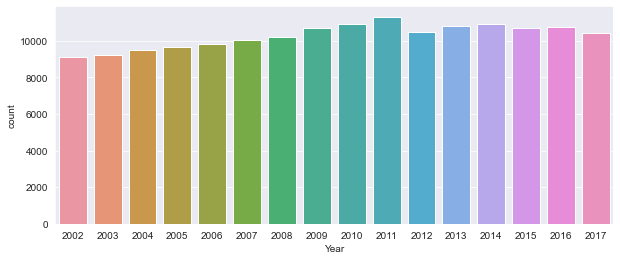

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,4))
sns.countplot(df['Year'])

Flags
---

    Flag column has eight different values which means the followings:

    A - Aggregate; may include official; semi-official; estimated or calculated data;
    E - Expert sources from FAO (including other divisions);
    Fb - Data obtained as a balance;
    Fm - Manual Estimation;
    P - Provisional official data;
    Qm - Official data from questionnaires and/or national sources and/or COMTRADE (reporters);
    R - Estimated data using trading partners database;
    W - Data reported on country official publications or web sites (Official) or trade country files;


Most of our data in an descending order is driven from 'Qm','R','Fb' sources and data flagged with 'Z','P','A' are negligible.

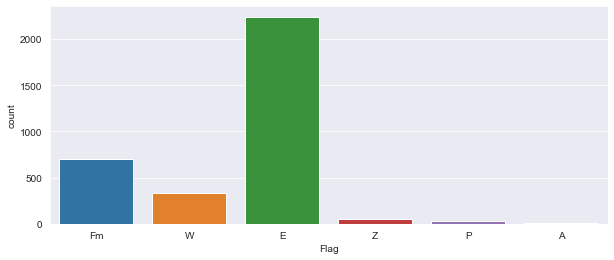

In [83]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,4))
sns.countplot(df[(df['Flag']!='Qm') & (df['Flag']!='R') & (df['Flag']!='Fb')]['Flag'])

In [11]:
df2 = df[(df['Flag']!='Z') & (df['Flag']!='P') & (df['Flag']!='A')]

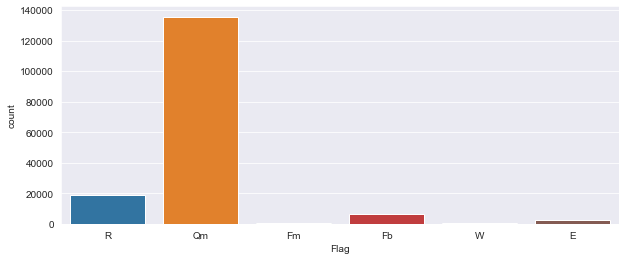

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,4))
sns.countplot(df2['Flag'])

Items
---

    Between 23 fertilizer items considered in this dataset the most favorable item is 'Urea'.the next is category of 'NPK Fertilizers' and the least is category of 'other NTK compounds'.

In [13]:
print('Number of different items envolved in this dataset : ',df2['Item Code'].nunique())

Number of different items envolved in this dataset :  23


In [14]:
templ = pd.DataFrame(df2['Item Code'].value_counts()).reset_index()
templ.columns = ['Item Code','Total Envolvement']
tempr = pd.DataFrame(df2[['Item Code','Item']]).groupby('Item').max().reset_index()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 <a list of 23 Text major ticklabel objects>)

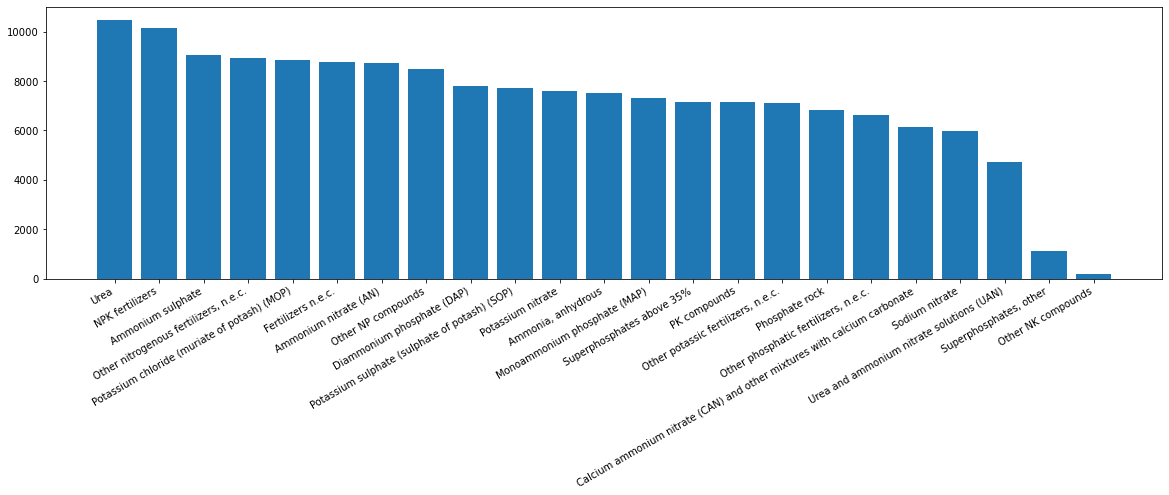

In [15]:
items = tempr.merge(templ,on='Item Code').sort_values(by='Total Envolvement',ascending=False)
fig , ax = plt.subplots(figsize=(20,5))
ax.bar(items['Item'],items['Total Envolvement'])
plt.xticks(rotation = 30,ha = 'right')

In [17]:
df3 = pd.DataFrame(df2.groupby(by=['Area','Element','Year']).mean()['Value'])

In [18]:
df3.head()


Value
Area        Element          Year         
Afghanistan Agricultural Use 2002  17900.0
                             2003  33200.0
                             2004  45000.0
                             2005  20577.0
                             2006  68253.0

In [19]:
Country_data = df3.reset_index()

Brazil as a sample
---

We took Brazil data to find trends in this country as a country most amount of data is driven from.

In [20]:
Brazil = Country_data[Country_data['Area']=='Brazil']
Brazil = Brazil.drop('Area',axis=1)

In [21]:
Brazil = Brazil.set_index('Year')

In [23]:
Brazil.head()

,Element,Value
Year,,
2002,Agricultural Use,1.564878e+06
2003,Agricultural Use,2.031378e+06
2004,Agricultural Use,1.823562e+06
2005,Agricultural Use,1.486388e+06
2006,Agricultural Use,1.534243e+06


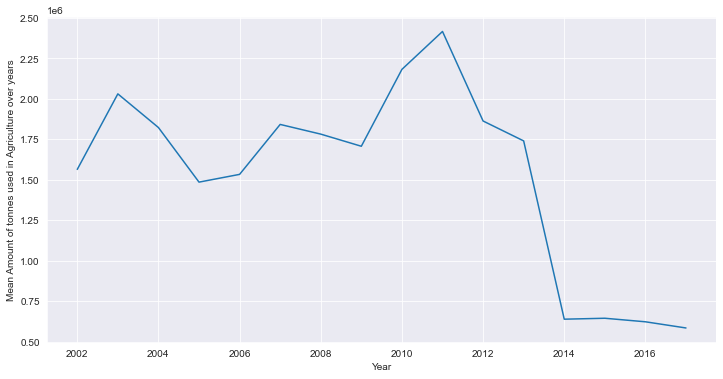

In [26]:
sns.set_style('darkgrid')
plt.ylabel('Mean Amount of tonnes used in Agriculture over years')
Brazil[Brazil['Element']=='Agricultural Use']['Value'].plot(figsize=(12,6))

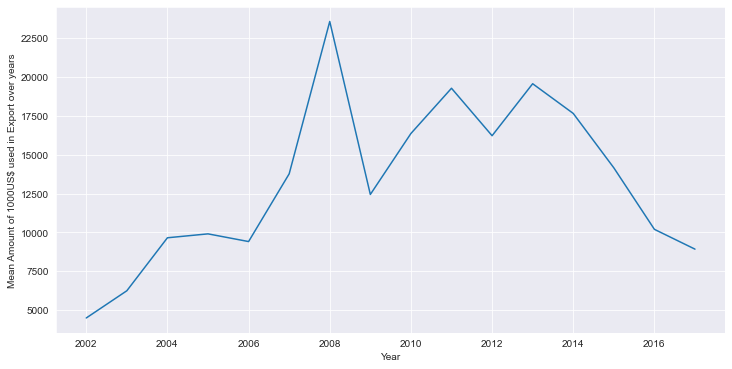

In [27]:
plt.ylabel('Mean Amount of 1000US$ used in Export over years')
Brazil[Brazil['Element']=='Export Value']['Value'].plot(figsize=(12,6))

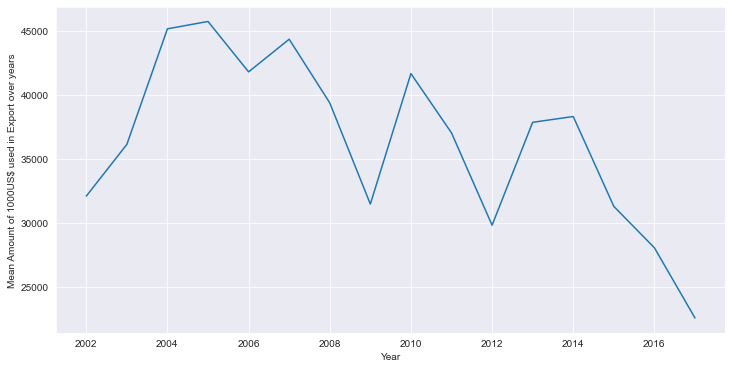

In [30]:
plt.ylabel('Mean Amount of 1000US$ used in Export over years')
Brazil[Brazil['Element']=='Export Quantity']['Value'].plot(figsize=(12,6))

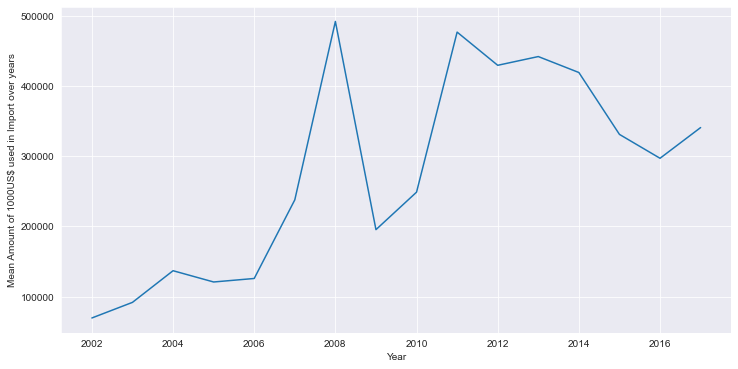

In [28]:
plt.ylabel('Mean Amount of 1000US$ used in Import over years')
Brazil[Brazil['Element']=='Import Value']['Value'].plot(figsize=(12,6))

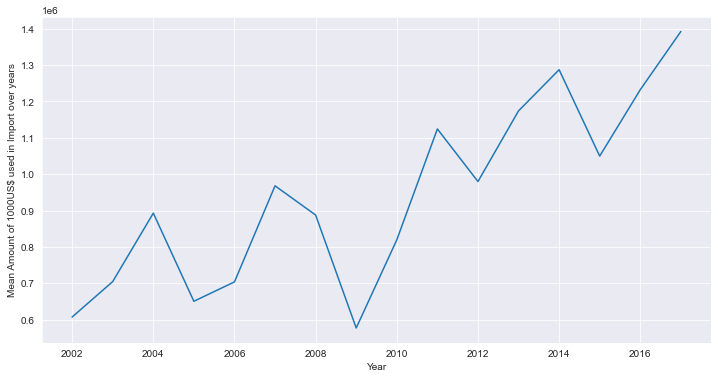

In [31]:
plt.ylabel('Mean Amount of 1000US$ used in Import over years')
Brazil[Brazil['Element']=='Import Quantity']['Value'].plot(figsize=(12,6))

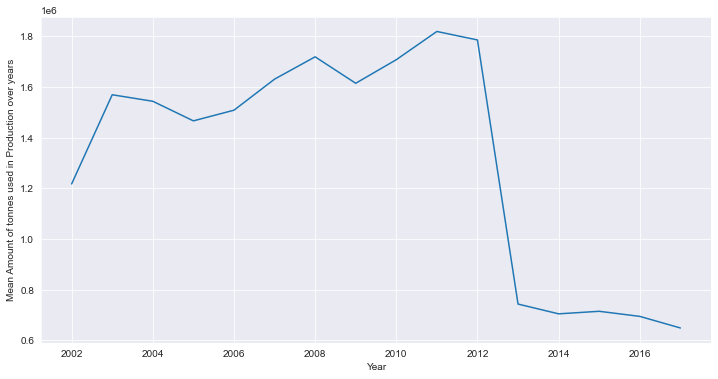

In [29]:
plt.ylabel('Mean Amount of tonnes used in Production over years')
Brazil[Brazil['Element']=='Production']['Value'].plot(figsize=(12,6))

    2008 is a year in which Brazil Experienced its maximum amount of Import and Export in US$, So we decided to get more information about items existed in this year's transactions.

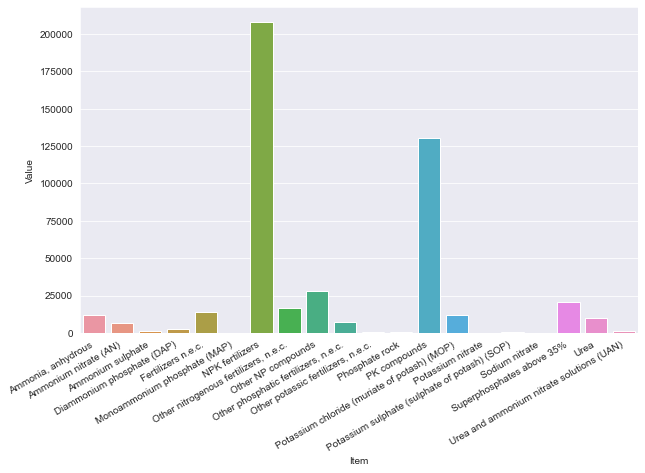

In [104]:
plt.figure(figsize=(10,6))
plt.xticks(rotation = 30,ha = 'right')
sns.barplot(df2[(df2['Area']=='Brazil')&(df2['Year']==2008)&(df2['Element']=='Export Value')]['Item'],
            df2[(df2['Area']=='Brazil')&(df2['Year']==2008)&(df2['Element']=='Export Value')]['Value'])

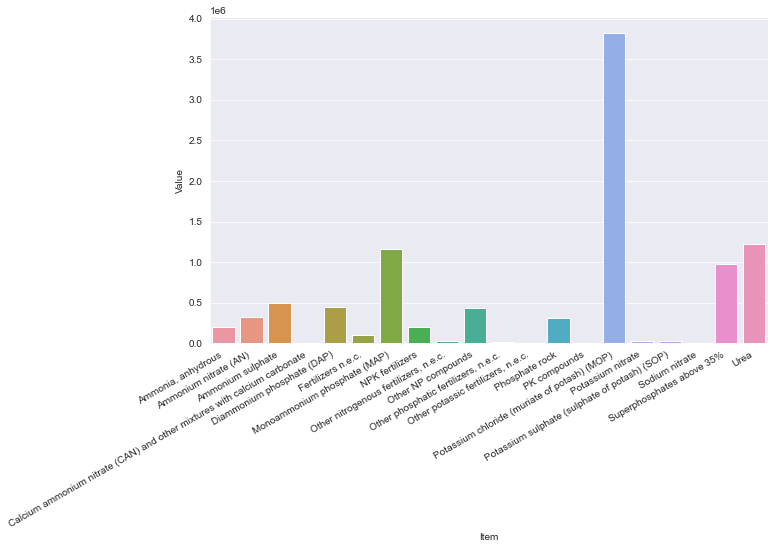

In [105]:
plt.figure(figsize=(10,6))
plt.xticks(rotation = 30,ha = 'right')
sns.barplot(df2[(df2['Area']=='Brazil')&(df2['Year']==2008)&(df2['Element']=='Import Value')]['Item'],
            df2[(df2['Area']=='Brazil')&(df2['Year']==2008)&(df2['Element']=='Import Value')]['Value'])

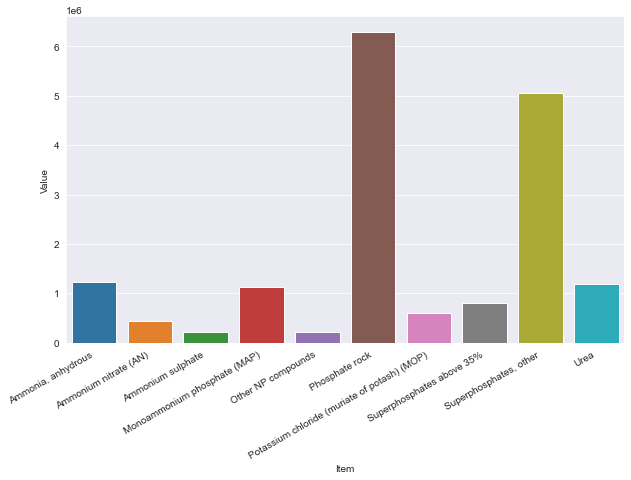

In [106]:
plt.figure(figsize=(10,6))
plt.xticks(rotation = 30,ha = 'right')
sns.barplot(df2[(df2['Area']=='Brazil')&(df2['Year']==2008)&(df2['Element']=='Production')]['Item'],
            df2[(df2['Area']=='Brazil')&(df2['Year']==2008)&(df2['Element']=='Production')]['Value'])
